### The Perceptron

It is based on a slightly different artificial neuron called a Threshold Logic Unit (TLU), or a Linear Threshold Unit (LTU). The input and output are numbers and each input connection is associated with a weight. The TLU computes a weighted sum of its input, then applies a step function to that sum and output the result.

The most common step function is the Heaviside step function, sometimes the sign function is used instead.


A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer, it is called a fully connected layer or a dense layer. An extra bias feature is generally added and it is represented using a special type of neuron called a bias neuron. 

Computing the ouputs of a fully connected layer:
h(X) = f(XW + b)

X represents the matrix of input features, and has one row per instance, one column per feature.

The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificial neuron in the layer.

The bias vector b contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.

The function f is called the activation function: when the artificial neurons are TLUs, it is a step function.



Perceptron Learning rule (weight update)

w(i, j)(next step) = w + n(yj - yj')xi


w = connection weight between the ith input neuron and the jth output neuron.

xi = ith input value of the current training instance.

yj' = output of the jth output neuron for the current training instance.

yj = target output of the jth output neuron for the current training instance.

n = learning rate.


The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns. However, if the training instances are linearly separable then this algorithm would converge to a solution. This is called Perceptron convergence theorem.

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

In [8]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [9]:
y_pred = per_clf.predict([[2, 0.5]])

In [10]:
y_pred

array([0])

### Multi-Layer Perceptron and Backpropagation

An MLP is composed of one input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer. 

The architecture in which the signal flows only in one direction is an example of a feedforward neural network (FNN).

When an ANN contains a deep stack of hidden layers, it is called a deep neural network.


In 1986, David Rumelhart, Geoffrey Hinton and Ronald Williams published a groundbreaking paper introducing the backpropagation training algorithm. It trains a neural network by adjusting its parameters using chain rule and gradients.

At first we initialize random values to weights and bias terms. Each mini-batch is passed to hte network's input layer and computes the output of all the neurons in the layer and eventually the output. It is called forward pass. Next, the algorithm measures the networks output error. Then we need to compute the new weights and bias using chain rule. 


In order for this algorithm to work properly, the step function is replaced by the logistic function. This is due to the step function contains only the flat segments, so there is no gradient to work with, while the logistic function has a well-defined nonzero derivative every where, allowing Gradient Descent to make some progress at every step.

The hyperbolic tangent function tanhz is just like logistic function is S-shaped, continuous, and differentiable, but its output values ranges from -1 to 1, which tends to make each layer's output more or less centered around 0 at the beginning of training. This often helps us convergence.

The Rectified Linear Unit function: It is continuous but not differentiable at z=0 and its derivative is 0 for z<0. It is fast to compute.


#### Regression MLPs
We don't need to use any activation function for the output neurons, so they are free to ouput any range of values. 

The loss function is the mean squared error, but if there are lot of outliers in the training set, we cna use the mean absolute error. Alternatively, we can use the Huber loss, which is combination of both.

The Huber loss is quadratic when the error is smaller than a threshold, but linear when the error is larger than del. This makes it less sensitive to outliers than the mean squared error, and it is often  more precise and converges faster than the mean absolute error. 

#### Classification MLPs
For a binary classification problem, we need a single output neuron using the logistic activation function: the output will be a number between 0 and 1. When wee need to do multi-class classification then we should use teh softmax activation function for the whole output layer. 

The loss function used is cross-entropy(log loss).

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

### Building an Image Classifier Using the Sequential API

In [27]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [28]:
X_train_full.shape

(60000, 28, 28)

In [29]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [31]:
class_names[y_train[0]]

'Coat'

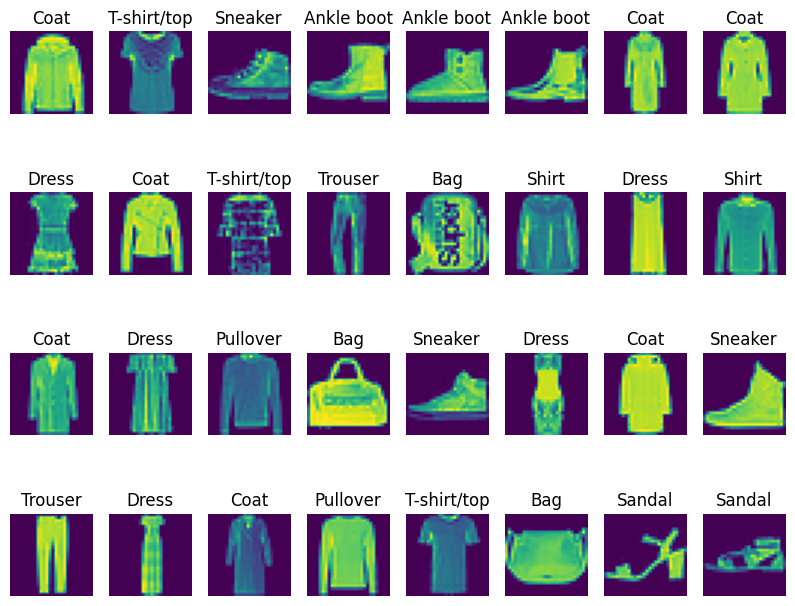

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

nrows = 4
ncols = 8
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))


for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        ax.imshow(X_train[i*ncols + j])
        ax.set_title(class_names[y_train[i*ncols+j]])
        ax.axis('off') 
    
plt.show()

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

The first line creates a Sequential model. It is the simplest kind of keras model, for neural networks that are just composed of a single stack of layers, connected sequentially.

Flatten layers converts each input image into 1D array: if it receives input data X, it computes X.reshape(-1, 1). 

Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms. 

Next we add a second Dense hidden layer of 100 neurons, also using the ReLU activation function.

Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function.

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
 model.layers

In [36]:
model.layers[1].name

'dense_3'

In [38]:
model.get_weights()

[array([[-0.03047784,  0.07171808,  0.06054644, ...,  0.00714511,
          0.06976329, -0.06281897],
        [ 0.06762205,  0.02744651, -0.00790626, ...,  0.01070041,
          0.07157265,  0.02959388],
        [-0.02327758, -0.00350762, -0.00976336, ..., -0.00548691,
         -0.07367939,  0.01040314],
        ...,
        [ 0.02549637,  0.00458974,  0.07275569, ...,  0.03108984,
         -0.02743961, -0.00913206],
        [ 0.00886937,  0.03938151,  0.02819976, ...,  0.00513887,
         -0.00144383,  0.03549043],
        [-0.07093623, -0.00487832, -0.01302024, ..., -0.00635948,
          0.02814087, -0.000515  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [39]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

We used the "sparse_categorical_crossentropy" loss because we have sparse labels, and the classes are exclusive. If instead we had one target probability per call for each instance then we would need to use the "categorical_crossentropy" loss instead. 

If we were doing binary classification, then we would use the "sigmoid" activation function instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

In [40]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7297 - accuracy: 0.7630 - val_loss: 0.5402 - val_accuracy: 0.8142
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4895 - accuracy: 0.8291 - val_loss: 0.4606 - val_accuracy: 0.8358
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4450 - accuracy: 0.8434 - val_loss: 0.4709 - val_accuracy: 0.8312
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4176 - accuracy: 0.8529 - val_loss: 0.4016 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3971 - accuracy: 0.8610 - val_loss: 0.3817 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3800 - accuracy: 0.8663 - val_loss: 0.3754 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3660 - accuracy: 0.8703 - val_loss: 0.3591 - val_accuracy:

If the performance on the training set is much better than on the validation set, then the model is probably overfitting the training set.

Instead of passing a validation set using the validation_data argument, we can instead set validation_split to the ratio of the training set that you want Keras to use for validation.


If the training set is very skewed, it is useful to set the `class_weight` argument when calling the `fit()` method, giving a larger weight to underrepresented classes, and a lower weight to overrepresented classes. 

If we need per-instance weights instead, we can set the `sample_weight` argument. Thi is useful when some instances were labeled by experts while others were labeled using a crowdsourcing platform. 

We can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.


The `fit()` method returns a History object containing the training parameters like `history.params`, `history.epoch`, and `history.history` containing the loss and extra metrics it measured at the end of each epoch on the training set and validation set. 

In [41]:
history.history

{'loss': [0.7297251224517822,
  0.48951640725135803,
  0.4449622631072998,
  0.4175903797149658,
  0.39709681272506714,
  0.37997275590896606,
  0.36596885323524475,
  0.35419851541519165,
  0.3447877764701843,
  0.3347516357898712,
  0.32634541392326355,
  0.31830930709838867,
  0.31088536977767944,
  0.30300652980804443,
  0.29867011308670044,
  0.29184263944625854,
  0.28674840927124023,
  0.28067049384117126,
  0.2762344479560852,
  0.2713547646999359,
  0.26567184925079346,
  0.26108136773109436,
  0.25656384229660034,
  0.25189489126205444,
  0.2481498271226883,
  0.2435893416404724,
  0.24094294011592865,
  0.23602069914340973,
  0.23156945407390594,
  0.22752434015274048],
 'accuracy': [0.7630363702774048,
  0.8290545344352722,
  0.8434000015258789,
  0.8529090881347656,
  0.8610363602638245,
  0.8662909269332886,
  0.8703091144561768,
  0.875036358833313,
  0.8767818212509155,
  0.8805636167526245,
  0.8834182024002075,
  0.886054515838623,
  0.888945460319519,
  0.89209091663

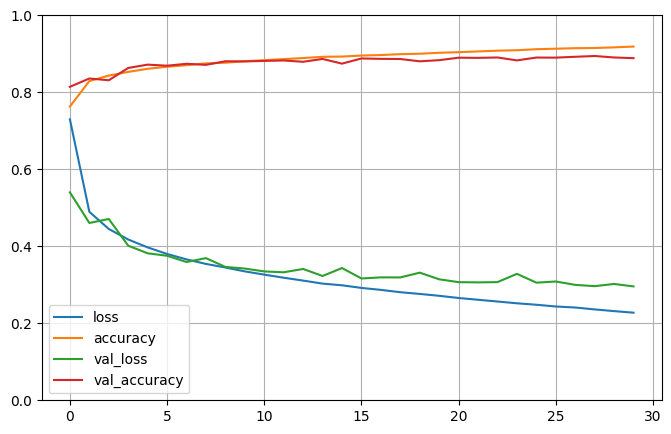

In [42]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As from the graph above, we knew that the model has not quite converged yet, as the validation loss is still going down, so we should probably continue training. It's simple as calling the `fit()` method again, since Keras just continues training where it left off.

In [43]:
history_add = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2245 - accuracy: 0.9194 - val_loss: 0.3104 - val_accuracy: 0.8878
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2202 - accuracy: 0.9221 - val_loss: 0.3096 - val_accuracy: 0.8842
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2171 - accuracy: 0.9223 - val_loss: 0.2987 - val_accuracy: 0.8894
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2136 - accuracy: 0.9236 - val_loss: 0.3099 - val_accuracy: 0.8920
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2106 - accuracy: 0.9247 - val_loss: 0.2929 - val_accuracy: 0.8924
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2076 - accuracy: 0.9257 - val_loss: 0.3005 - val_accuracy: 0.8880
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2030 - accuracy: 0.9280 - val_loss: 0.2995 - val_accuracy:

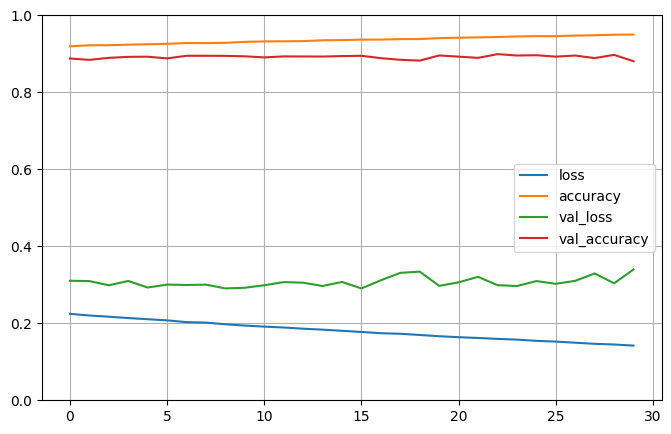

In [44]:
pd.DataFrame(history_add.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 98.8905 - accuracy: 0.8130


[98.8904800415039, 0.8130000233650208]

In [63]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
print(y_proba)

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [54]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [90]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [91]:
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [93]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 32901341118464.0000 - val_loss: 11097123840.0000
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 5863647232.0000 - val_loss: 2594081280.0000
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1370696704.0000 - val_loss: 606395840.0000
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 320416160.0000 - val_loss: 141751344.0000
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 74900960.0000 - val_loss: 33135718.0000
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 17508970.0000 - val_loss: 7745726.0000
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 4092924.2500 - val_loss: 1810591.1250
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 956771.3750 - val_loss: 423216.7188
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 223

In [94]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.3307


In [95]:
print(mse_test)

1.3306711912155151


In [96]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 50ms/step
[[1.9768566]
 [1.9768566]
 [1.9768566]]
[0.477   0.458   5.00001]
